In [51]:
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pei.myfunctions as mf

## Load 1950-1959 Data

In [55]:
# Specify root directory, experiment, filename format
rootdir = '/local/ss23/GFDL_LEs/ATM/'
experiment = 'RCP85'
filename = '/t_ref.rcp85.ens*.1950_1959.nc'
paths = rootdir+experiment+filename

# Load data from matching files
data = xr.open_mfdataset(paths,combine='nested',concat_dim='ensemble')

# Convert data to annual average
mean_annual = mf.annual_average(data,'t_ref')

## Load Area Data

In [56]:
# Load area data
filename_area = 'land_static.nc'
path_area = rootdir+filename_area
land_area = xr.open_dataset(path_area)['land_area']

## Calculate Area-Weighted Averages

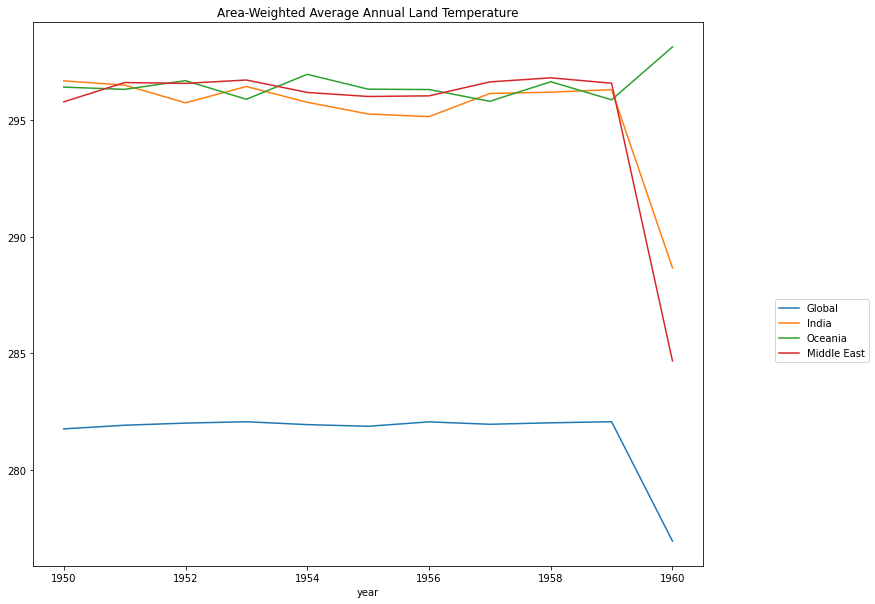

In [57]:
# Create figure, axes
fig, ax = plt.subplots(figsize=(12,10))

# Calculate global area-weighted average
area_mean = (mean_annual*land_area).sum(['lon','lat'])/land_area.sum(['lon','lat'])
area_mean.plot(ax=ax)

regions = ['India','Oceania','Middle East']

# Plot regions
for region in regions:
    # Calculate area-weighted average temperature
    regional_mean = mf.area_weighted(mean_annual,land_area,region)

    # Plot area-weighted average
    regional_mean.plot(ax=ax)

ax.set_title('Area-Weighted Average Annual Land Temperature')
ax.legend(['Global']+regions,bbox_to_anchor=(1.1,0.5))